In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# total of 1.25e8 rows
tf_reader = pd.read_csv("data/train.csv",
            dtype={'onpromotion':str}, 
            chunksize=10**7) 

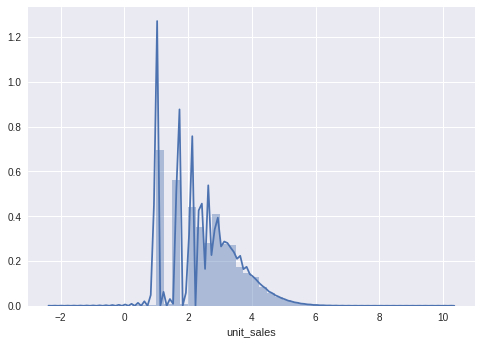

In [5]:
chunk = tf_reader.get_chunk()
chunk = chunk[chunk.unit_sales > 0]
sns.distplot(np.log(chunk.unit_sales)+1)
plt.show()

In [15]:
chunk.date.value_counts().sample(10)

2013-02-19    40444
2013-05-07    42066
2013-01-08    39130
2013-07-14    45399
2013-07-11    42332
2013-07-01    46588
2013-04-26    41661
2013-04-19    41777
2013-03-25    41957
2013-03-05    41859
Name: date, dtype: int64

502331    10694
314384    10689
587069    10685
839363    10676
559870    10671
Name: item_nbr, dtype: int64

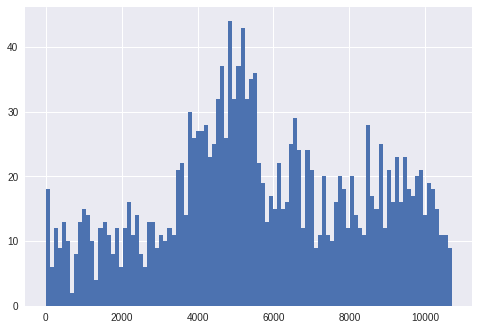

In [23]:
chunk.item_nbr.value_counts().hist(bins=100)
plt.show()

In [35]:
chunk.unit_sales.median()

4.0

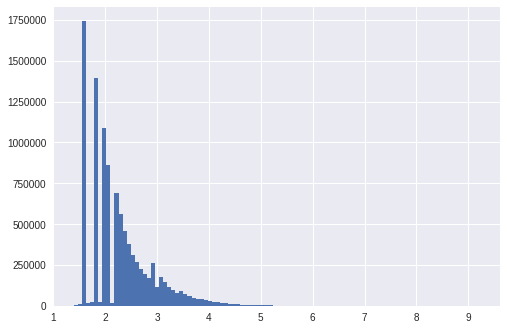

In [47]:
chunk.unit_sales.map(lambda x: np.log(x+4)).hist(bins=100)
plt.show()

In [61]:
chunk.store_nbr.unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36])

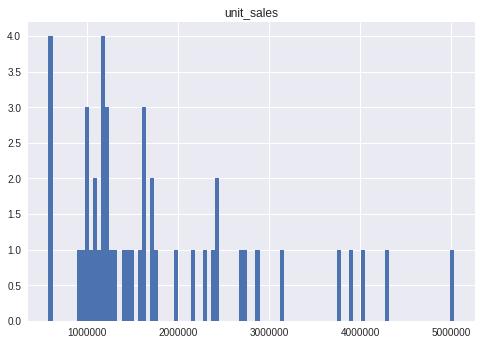

In [63]:
chunk.groupby('store_nbr').agg({'unit_sales' : sum}).hist(bins=100)
plt.show()

In [10]:
%ls data/

holidays_events.csv     sample_submission.csv     train.csv
holidays_events.csv.7z  sample_submission.csv.7z  train.csv.7z
items.csv               stores.csv                transactions.csv
items.csv.7z            stores.csv.7z             transactions.csv.7z
oil.csv                 test.csv
oil.csv.7z              test.csv.7z


In [73]:
oil = pd.read_csv('data/oil.csv', parse_dates = ['date'])

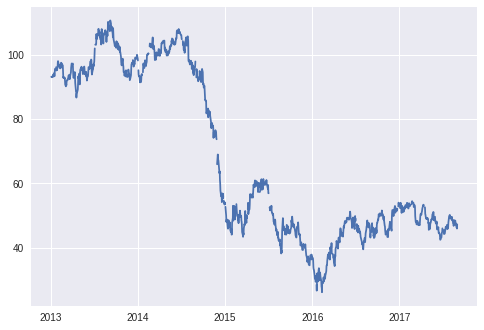

In [76]:
plt.plot(oil.date, oil.dcoilwtico)
plt.show()

### handle the low amount of ram I have on my laptop:
#### create a bunch of files that each have the full set of dates for store/item combinations

In [59]:
# find out all unique stores, all unique dates, all unique items
unique_dates = []
unique_items = []
unique_stores = []
tf_reader = pd.read_csv("data/train.csv",
            dtype={'onpromotion':str}, 
            chunksize=10000000)
for i in range(20):
    chunk = tf_reader.get_chunk()
    print i
    print chunk.shape
    print chunk.date.unique().max()

0
(10000000, 6)
2013-08-21
1
(10000000, 6)
2014-03-06
2
(10000000, 6)
2014-09-01
3
(10000000, 6)
2015-01-25
4
(10000000, 6)
2015-06-27
5
(10000000, 6)
2015-10-22
6
(10000000, 6)
2016-02-08
7
(10000000, 6)
2016-05-23
8
(10000000, 6)
2016-09-04
9
(10000000, 6)
2016-12-15
10
(10000000, 6)
2017-03-22
11
(10000000, 6)
2017-06-24
12
(5497040, 6)
2017-08-15


StopIteration: 

In [60]:
chunk.shape

(5497040, 6)